In [1]:
import tensorflow as tf
from tensorflow import keras 
import matplotlib.pyplot as plt 
import numpy as np 

In [2]:
tf.config.experimental.list_physical_devices()

[PhysicalDevice(name='/physical_device:CPU:0', device_type='CPU')]

In [3]:
tf.test.is_built_with_cuda()

False

tensorflow is built with cuda since i do not have a gpu that why we do not gpu that why it i have not istalled cuda 

In [4]:
(x_train,y_train),(x_test,y_test)=tf.keras.datasets.cifar10.load_data()

In [5]:
x_train.shape

(50000, 32, 32, 3)

the third dimension is of rgb red green blue any image has three channel that is rgb 

In [6]:
y_train.shape

(50000, 1)

In [7]:
y_train[:6]

array([[6],
       [9],
       [9],
       [4],
       [1],
       [1]], dtype=uint8)

In [8]:
def plot_sample(index):
    plt.figure(figsize=(10,1))
    plt.imshow(x_train[index])
    plt.xlabel(y_train[index])

c:\MinGW\python32\Lib\site-packages\matplotlib\text.py:1279: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if s != self._text:


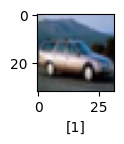

In [9]:
plot_sample(4)

In [10]:
classes=["airplane","automobile","bird","cat","deer","frog","horse","ship","truck"]

In [11]:
def plot_sample(index):
    plt.figure(figsize=(10,1))
    plt.imshow(x_train[index])
    plt.xlabel(classes[y_train[index][0]])

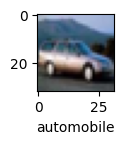

In [12]:
plot_sample(4)

In [13]:
x_train_scalled=x_train/255
x_test_scalled=x_test/255

In [14]:
x_train_scalled

array([[[[0.23137255, 0.24313725, 0.24705882],
         [0.16862745, 0.18039216, 0.17647059],
         [0.19607843, 0.18823529, 0.16862745],
         ...,
         [0.61960784, 0.51764706, 0.42352941],
         [0.59607843, 0.49019608, 0.4       ],
         [0.58039216, 0.48627451, 0.40392157]],

        [[0.0627451 , 0.07843137, 0.07843137],
         [0.        , 0.        , 0.        ],
         [0.07058824, 0.03137255, 0.        ],
         ...,
         [0.48235294, 0.34509804, 0.21568627],
         [0.46666667, 0.3254902 , 0.19607843],
         [0.47843137, 0.34117647, 0.22352941]],

        [[0.09803922, 0.09411765, 0.08235294],
         [0.0627451 , 0.02745098, 0.        ],
         [0.19215686, 0.10588235, 0.03137255],
         ...,
         [0.4627451 , 0.32941176, 0.19607843],
         [0.47058824, 0.32941176, 0.19607843],
         [0.42745098, 0.28627451, 0.16470588]],

        ...,

        [[0.81568627, 0.66666667, 0.37647059],
         [0.78823529, 0.6       , 0.13333333]

one hot encoding 

In [15]:
y_train_categorical=keras.utils.to_categorical(y_train,num_classes=10,dtype='float32')

In [16]:
y_train_categorical[:5]

array([[0., 0., 0., 0., 0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.]], dtype=float32)

In [17]:
y_test_categorical=keras.utils.to_categorical(y_test,num_classes=10,dtype='float32')

In [18]:
y_test_categorical[:5]

array([[0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 1., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 1., 0., 0., 0.]], dtype=float32)

model building 

In [19]:
model=keras.Sequential([
    # input layer 
    keras.layers.Flatten(input_shape=(32,32,3),),
    # hidden layer 
    keras.layers.Dense(3000, activation='relu'),
    keras.layers.Dense(2000, activation='relu'),
    keras.layers.Dense(1000, activation='relu'),
    # output layer
    keras.layers.Dense(10, activation='sigmoid'),
    
])

In [21]:
model.compile(optimizer='sgd',
              loss='categorical_crossentropy',
              # whenever we have a categorical data we use the categorical crossentrohy as a loss function 
              metrics=['accuracy'])


In [25]:
model.fit(x_train_scalled,y_train_categorical,epochs=3)

Epoch 1/3
1563/1563 [==============================] - 238s 147ms/step - loss: 1.3672 - accuracy: 0.5175
Epoch 2/3
1563/1563 [==============================] - 220s 140ms/step - loss: 1.3247 - accuracy: 0.5327
Epoch 3/3
1563/1563 [==============================] - 208s 133ms/step - loss: 1.2844 - accuracy: 0.5460


In [26]:
classes[np.argmax(model.predict(x_test_scalled)[0])]

313/313 [==============================] - 13s 41ms/step


'cat'

In [ ]:
classes[y_test[0][0]]

In [27]:
model.evaluate(x_test_scalled,y_test_categorical)

313/313 [==============================] - 33s 37ms/step - loss: 1.3957 - accuracy: 0.4987


[1.395673155784607, 0.49869999289512634]